### Capacity chart as proposed by Ana

The transcriptome and init rates are held constant (see /home/martin/git/TRSL/analysis/TRSL_vary_ribosomes_tRNA_uniform_transcriptome.py).

In [39]:
import cPickle as pkl
import numpy as np
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
#matplotlib.style.use('ggplot')
import pandas as pd

from collections import defaultdict

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", l

In [82]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Runs in which tRNAs are co-varied:

Runs, produced with $\Delta t = 0.2 \mathrm{s}$:

Runs, produced with $\Delta t = 0.05 \mathrm{s}$:

Test runs with low ribosome counts, produced with $\Delta t = 0.05 \mathrm{s}$:

In [ ]:
runs = [
r"/home/martin/git/TRSL/results/50 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1357_50_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/50 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1418_50_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/100 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1503_100_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/100 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1527_100_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/150 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1617_150_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/150 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1643_150_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/200 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1731_200_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/200 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1759_200_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/250 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1850_250_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/250 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1921_250_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/300 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2013_300_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/300 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2046_300_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/350 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2141_350_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/350 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2216_350_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/400 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2312_400_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/400 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_2348_400_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/450 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_0046_450_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/450 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_0124_450_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/500 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_0226_500_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/500 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_0305_500_ribosomes_1200s.p",
]

In [84]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

Only run once:

In [85]:
for run in runs[-6:]:
    print run
    replace(run, "_numpypy.multiarray", "numpy.core.multiarray")

/home/martin/git/TRSL/results/300000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180323_0818_300000_ribosomes_1200s.p
/home/martin/git/TRSL/results/300000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180323_2138_300000_ribosomes_1200s.p
/home/martin/git/TRSL/results/350000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180324_1359_350000_ribosomes_1200s.p
/home/martin/git/TRSL/results/350000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180324_2207_350000_ribosomes_1200s.p
/home/martin/git/TRSL/results/400000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180325_1145_400000_ribosome

In [86]:
from matplotlib.font_manager import FontProperties

ribo = {}
ribo_free = {}
ribo_bound = {}

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    
    if len(results['transcriptome']) in ribo:
        ribo[len(results['transcriptome'])].append(results['n_ribosomes'])
    else:
        ribo[len(results['transcriptome'])] = [results['n_ribosomes']]
        
    if len(results['transcriptome']) in ribo_free:
        ribo_free[len(results['transcriptome'])].append(results["timecourses"]["ribos._free"][-1])
    else:
        ribo_free[len(results['transcriptome'])] = [results["timecourses"]["ribos._free"][-1]]

    if len(results['transcriptome']) in ribo_bound:
        ribo_bound[len(results['transcriptome'])].append(results["timecourses"]["ribos._bound"][-1])
    else:
        ribo_bound[len(results['transcriptome'])] = [results["timecourses"]["ribos._bound"][-1]]

transcriptome length: 56592
50000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 28296
50000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 56592
100000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 28296
100000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 56592
150000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 28296
150000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 56592
200000 r

In [87]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [88]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...


In [89]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]


In [90]:
data = pd.Panel4D(timecourses)
data

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel4D is deprecated and will be removed in a future version.
The recommended way to represent these types of n-dimensional data are with
the `xarray package <http://xarray.pydata.org/en/stable/>`__.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 8 (labels) x 2 (items) x 24000 (major_axis) x 4716 (minor_axis)
Labels axis: 50000 to 400000
Items axis: 30061 to 60000
Major_axis axis: 0 to 23999
Minor_axis axis: YAL001C to YPR199C

In [91]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 2 (major_axis) x 24000 (minor_axis)
Items axis: 50000 to 400000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0 to 23999

In [92]:
#print total_protein.minor_xs(59.98000000000001)
print total_protein.axes[2]
print len(total_protein.axes[2])

RangeIndex(start=0, stop=24000, step=1)
24000


We accept this index as it might be quicker and easier to address.

In [93]:
deltat = 0.05  # or 0.2

In [94]:
total_protein.minor_xs

<bound method Panel.minor_xs of <class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 2 (major_axis) x 24000 (minor_axis)
Items axis: 50000 to 400000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0 to 23999>

TODO: the 5998 and 4498 should be different depending on the delta t

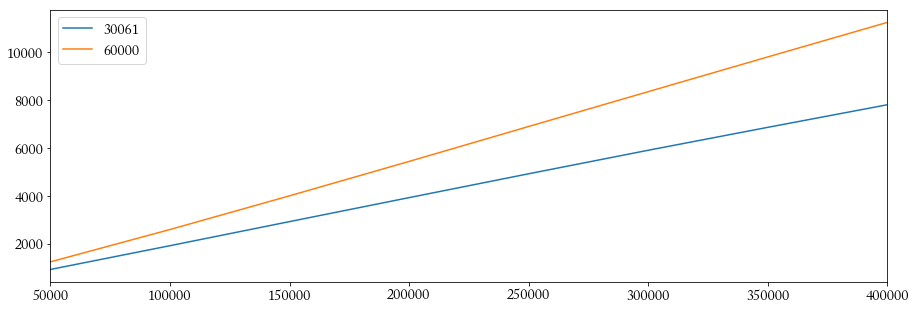

In [95]:
trans_eff_cell = (total_protein.minor_xs(23998) - total_protein.minor_xs(17998))/(300.0)
trans_eff_cell.T.plot()

In [96]:
ribo_numbers

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]

In [97]:
trans_eff_cell

,50000,100000,150000,200000,250000,300000,350000,400000
30061,944.670000,1935.046667,2939.056667,3938.670000,4932.676667,5912.920000,6868.330000,7809.833333
60000,1260.873333,2609.296667,4013.446667,5447.913333,6903.853333,8355.803333,9803.476667,11243.103333


In [98]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

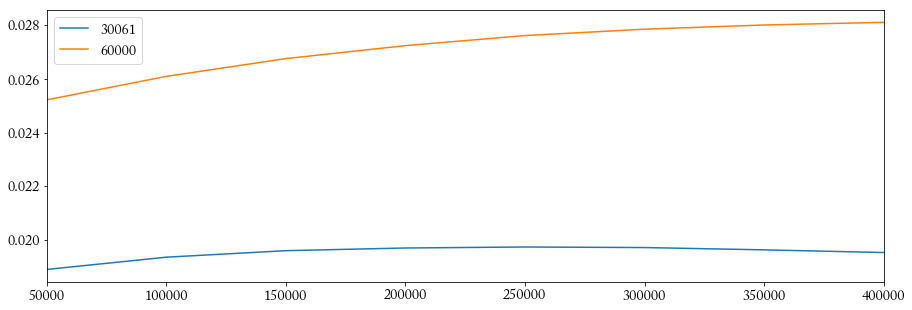

In [99]:
trans_eff_per_ribo.T.plot()

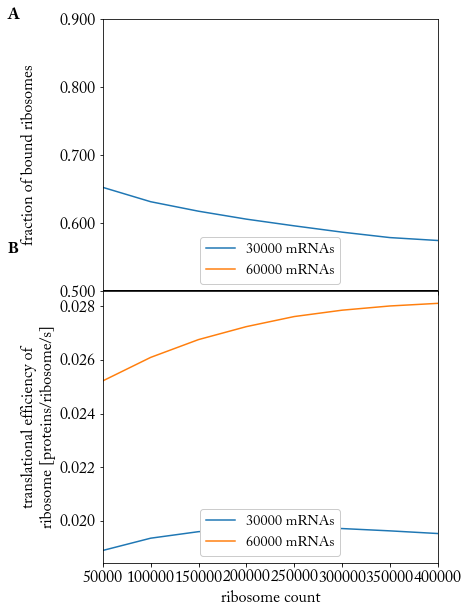

In [100]:
plt.rcParams['figure.figsize'] = (6, 10)

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

#######################################################################################################################
x1 = np.array(ribo[ribo.keys()[0]])
y1 = np.array(ribo_bound[ribo.keys()[0]]) * 1.0 / np.array(ribo[ribo.keys()[0]])
ax1.plot(x1, y1)

x1 = np.array(ribo[ribo.keys()[1]])
y1 = np.array(ribo_bound[ribo.keys()[1]]) * 1.0 / np.array(ribo[ribo.keys()[1]])
ax1.plot(x1, y1)

ax = ax1
ax.set_ylabel("fraction of bound ribosomes\n", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

xpos = np.array(ribo_numbers)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos, fontsize=16)

ypos = np.arange(0.5, 0.91, 0.1)
ax.set_yticks(ypos)
#ax.set_yticklabels(ypos, fontsize=16)
ax.set_yticklabels(["%.3f" % round(p,1) for p in ypos], fontsize=16)

ax.axhline(0.5, color='black', lw=2)

ax.set_ylim([0.5, 0.9])

ax.text(-50000, 0.9, "A", fontsize=16, weight="bold")

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0)
#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
trans_eff_per_ribo.T.plot(ax=ax)
ypos = np.arange(0.02, 0.03, 0.002)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p,3) for p in ypos], fontsize=16)
ax.set_ylabel("translational efficiency of\nribosome [proteins/ribosome/s]", fontsize=16)

ax.set_xlabel("ribosome count", fontsize=16)

#ax.set_ylim([0.02, 0.03])

ax.text(-50000, 0.03, "B", fontsize=16, weight="bold")

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0)

#######################################################################################################################
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

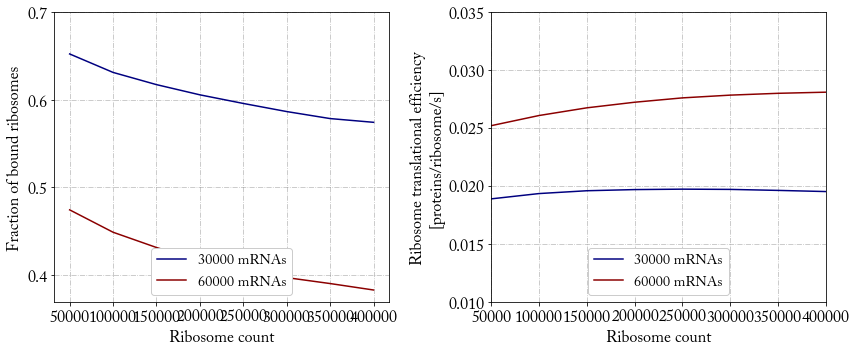

In [101]:
plt.close('all')

plt.rc('font',family='serif')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
#plt.rcParams['figure.facecolor'] = 'white'

hfont = {'fontname': u'Adobe Caslon Pro'}

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, subplot_kw=dict(axisbg='white'))
plt.grid()

#######################################################################################################################
x1 = np.array(ribo[ribo.keys()[0]])
y1 = np.array(ribo_bound[ribo.keys()[0]]) * 1.0 / np.array(ribo[ribo.keys()[0]])
ax1.plot(x1, y1, color='navy')

x1 = np.array(ribo[ribo.keys()[1]])
y1 = np.array(ribo_bound[ribo.keys()[1]]) * 1.0 / np.array(ribo[ribo.keys()[1]])
ax1.plot(x1, y1, color='darkred')

ax = ax1
ax.set_ylabel("Fraction of bound ribosomes", fontsize=16, **hfont)
plt.tick_params(axis='both', which='major', labelsize=16)

#xpos = np.arange(100000, 500001, 100000)
#xpos = np.arange(50, 501, 50)
xpos = np.array(ribo_numbers)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos, fontsize=16, **hfont)

ypos = np.arange(0.4, 0.71, 0.1)
ax.set_yticks(ypos)
ax.set_yticklabels(ypos, fontsize=16, **hfont)

#ax.axhline(0.5, color='black', lw=2)

ax.set_xlabel("Ribosome count", fontsize=16, **hfont)

#ax.set_ylim([0.4, 0.8])

#ax.text(-50000, 0.9, "A", fontsize=16, weight="bold", **hfont)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
trans_eff_per_ribo.T.plot(ax=ax, color=['navy', 'darkred'])
#xpos = np.arange(100000, 500001, 100000)
#xpos = np.arange(50, 501, 50)
xpos = np.array(ribo_numbers)

ypos = np.arange(0.01, 0.04, 0.005)
ax.set_xticks(xpos)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p, 3) for p in ypos], fontsize=16)
ax.set_ylabel("Ribosome translational efficiency\n[proteins/ribosome/s]", fontsize=16, **hfont)

ax.set_xlabel("Ribosome count", fontsize=16, **hfont)

#ax.set_ylim([0.01, 0.025])

#ax.text(-50000, 0.03, "B", fontsize=16, weight="bold", **hfont)

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#######################################################################################################################
# Fine-tune figure; make subplots close to each other 
#f.subplots_adjust(hspace=0)
f.tight_layout()

#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.savefig("ribosome_efficiency_constant_transcriptome.pgf")

In [102]:
ribo_variation_df = trans_eff_per_ribo.T

In [103]:
ribo_variation_df.columns = ['TE_30061', 'TE_60000']

In [104]:
ribo_bound

{28296: [23713, 44867, 64683, 83244, 101738, 119037, 136501, 153052],
 56592: [32625, 63139, 92614, 121152, 148976, 175989, 202516, 229737]}

In [105]:
ribo_variation_df['bound_28296'] = ribo_bound[28296]

In [106]:
ribo_variation_df['bound_56592'] = ribo_bound[56592]

In [107]:
ribo_variation_df

,TE_30061,TE_60000,bound_28296,bound_56592
50000,0.018893,0.025217,23713,32625
100000,0.019350,0.026093,44867,63139
150000,0.019594,0.026756,64683,92614
200000,0.019693,0.027240,83244,121152
250000,0.019731,0.027615,101738,148976
300000,0.019710,0.027853,119037,175989
350000,0.019624,0.028010,136501,202516
400000,0.019525,0.028108,153052,229737


In [108]:
with open('../../results/ribo_variation_uniform_df.p', 'w') as handle:
    pkl.dump(ribo_variation_df, handle)

Check if the file is there and what it contains:

In [109]:
print pkl.load(open('../../results/ribo_variation_uniform_df.p', 'r'))

        TE_30061  TE_60000  bound_28296  bound_56592
50000   0.018893  0.025217        23713        32625
100000  0.019350  0.026093        44867        63139
150000  0.019594  0.026756        64683        92614
200000  0.019693  0.027240        83244       121152
250000  0.019731  0.027615       101738       148976
300000  0.019710  0.027853       119037       175989
350000  0.019624  0.028010       136501       202516
400000  0.019525  0.028108       153052       229737
